In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os
from PIL import Image

In [ ]:
#load data
(x_train,y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# pre processing
x_train = x_train.astype("float32") / 255.0
x_train = np.reshape (x_train, (len(x_train), 28, 28, 1))

x_test = x_test.astype("float32") / 255.0
x_test = np.reshape (x_test, (len(x_test), 28,28,1) )
print(x_train.shape)
print(x_test.shape)
# add noise
noise_factor = 0.5
noisy_x_train = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
noisy_x_train = np.clip(noisy_x_train, 0.0, 1.0)

noisy_x_test = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
noisy_x_test = np.clip(noisy_x_test, 0.0,1.0)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


input_layer = Input(shape=(28, 28, 1))

# -------- ENCODER --------
x = layers.Conv2D(32, (3,3), activation="relu", padding="same", name="enc_conv1")(input_layer)
x = layers.MaxPooling2D((2,2), padding="same", name="enc_pool1")(x)
x = layers.Conv2D(32, (3,3), activation="relu", padding="same", name="enc_conv2")(x)
encoded = layers.MaxPooling2D((2,2), padding="same", name="enc_pool2")(x)

# -------- DECODER --------
x = layers.Conv2DTranspose(32, (3,3), strides=2, padding="same", activation="relu", name="dec_deconv1")(encoded)
x = layers.Conv2DTranspose(32, (3,3), strides=2, padding="same", activation="relu", name="dec_deconv2")(x)
decoded = layers.Conv2DTranspose(1, (3,3) , padding="same", activation="sigmoid", name="dec_output")(x)

# -------- DETECTOR --------
y = layers.Conv2D(32, (3,3), activation="relu", padding="same", name="det_conv1")(decoded)
y = layers.MaxPooling2D((2,2), padding="same", name="det_pool1")(y)
y = layers.Conv2D(32, (3,3), activation="relu", padding="same", name="det_conv2")(y)
y = layers.MaxPooling2D((2,2), padding="same", name="det_pool2")(y)
y = layers.Flatten()(y)
y = layers.Dense(64, activation="relu")(y)
output_class = layers.Dense(10, activation="softmax", name="class_output")(y)

model = models.Model(inputs=input_layer, outputs=[decoded, output_class])

model.compile(
    optimizer='adam',
    loss={
        'dec_output': 'binary_crossentropy',
        'class_output': 'categorical_crossentropy'
    },
    metrics={
        'class_output': 'accuracy'
    }
)
model.summary()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv1 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_pool1 (MaxPooling2D)        │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv2 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_pool2 (MaxPooling2D)        │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_deconv1 (Conv2DTranspose)   │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_deconv2 (Conv2DTranspose)   │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_output (Conv2DTranspose)    │ (None, 28, 28, 1)      │           289 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ det_conv1 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ det_pool1 (MaxPooling2D)        │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ det_conv2 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ det_pool2 (MaxPooling2D)        │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_output (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,987 (542.92 KB)

 Trainable params: 138,987 (542.92 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(
    x=noisy_x_train,
    y={'dec_output': noisy_x_train, 'class_output': y_train},
    epochs=25,
    batch_size=128,
    validation_data=(noisy_x_test, {'dec_output': noisy_x_test, 'class_output': y_test})
)

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 150s 307ms/step - class_output_accuracy: 0.4276 - class_output_loss: 1.5405 - dec_output_loss: 0.5728 - loss: 2.1133 - val_class_output_accuracy: 0.9285 - val_class_output_loss: 0.2213 - val_dec_output_loss: 0.5169 - val_loss: 0.7405
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 302ms/step - class_output_accuracy: 0.9294 - class_output_loss: 0.2209 - dec_output_loss: 0.5142 - loss: 0.7351 - val_class_output_accuracy: 0.9490 - val_class_output_loss: 0.1557 - val_dec_output_loss: 0.5116 - val_loss: 0.6690
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 308ms/step - class_output_accuracy: 0.9483 - class_output_loss: 0.1602 - dec_output_loss: 0.5083 - loss: 0.6685 - val_class_output_accuracy: 0.9572 - val_class_output_loss: 0.1264 - val_dec_output_loss: 0.5019 - val_loss: 0.6298
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 291ms/step - class_output_accuracy: 0.9578 - class_output_loss: 0.1296 - dec_output_loss: 0.5030 - loss: 0.6325 - val_class_output_ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


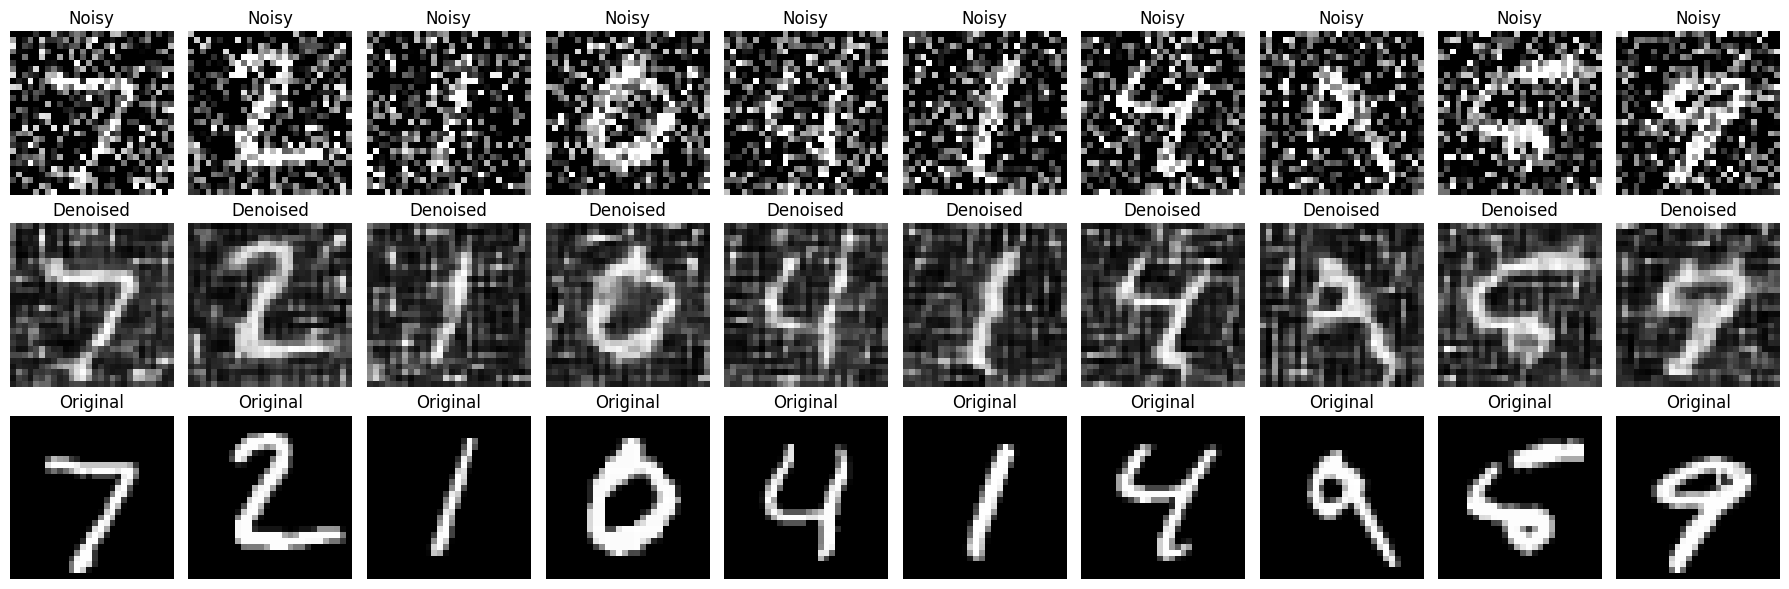

In [ ]:
decoded_imgs, _ = model.predict(noisy_x_test[:10])

n = 10
plt.figure(figsize=(18, 6))
for i in range(n):
    # noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(noisy_x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    #  denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis("off")

    # original
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

plt.tight_layout()
plt.show()


 comparison OF ENCODER and DETECTOR conv layers 
Total Weights Compared: 9,504
Mean Absolute Difference (MAD): 0.156214
Cosine Similarity  (CosSim): 0.013924


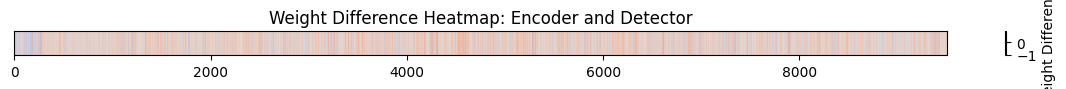

In [ ]:
# weights of encoder and detector
encoder_layers = ["enc_conv1", "enc_conv2"]
detector_layers = ["det_conv1", "det_conv2"]

def get_concat_weights(layer_names):
    all_weights = []
    for name in layer_names:
        weights = model.get_layer(name).get_weights()
        if weights:  #  weights[0] = kernel, weights[1] = bias
            all_weights.append(weights[0].flatten())  # just kernels
    return np.concatenate(all_weights)

enc_weights = get_concat_weights(encoder_layers)
det_weights = get_concat_weights(detector_layers)

# comparison metrics
def compare_weight_blocks(w1, w2):
    mad = np.mean(np.abs(w1 - w2))
    cos_sim = np.dot(w1, w2) / (np.linalg.norm(w1) * np.linalg.norm(w2) + 1e-10)
    return mad, cos_sim

# Compute and print results
mad_total, cos_total = compare_weight_blocks(enc_weights, det_weights)

print(" comparison OF ENCODER and DETECTOR conv layers ")
print(f"Total Weights Compared: {len(enc_weights):,}")
print(f"Mean Absolute Difference (MAD): {mad_total:.6f}")
print(f"Cosine Similarity  (CosSim): {cos_total:.6f}")

diff = enc_weights - det_weights
plt.figure(figsize=(12, 1))
plt.imshow(diff.reshape(1, -1), cmap='coolwarm', aspect='auto')
plt.colorbar(label="Weight Difference")
plt.title("Weight Difference Heatmap: Encoder and Detector")
plt.yticks([])
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
 File: zero.bmp =>  Predicted Digit: 0


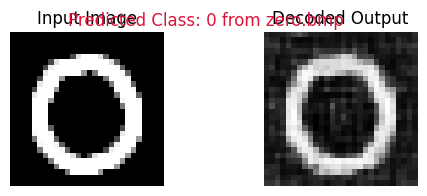

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
 File: one.bmp =>  Predicted Digit: 1


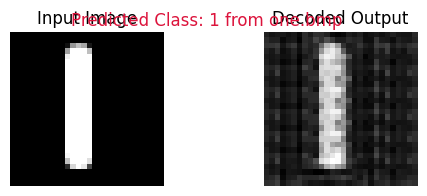

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
 File: two.bmp =>  Predicted Digit: 2


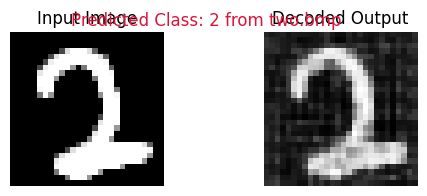

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
 File: three.bmp =>  Predicted Digit: 3


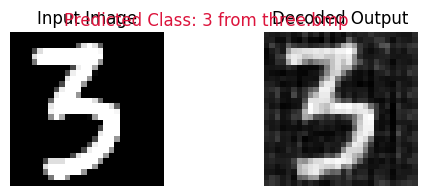

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
 File: four.bmp =>  Predicted Digit: 7


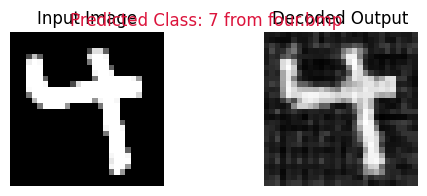

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
 File: five.bmp =>  Predicted Digit: 5


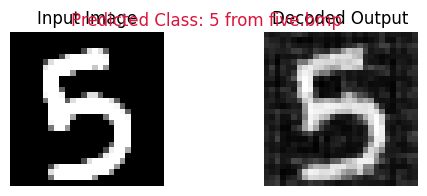

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
 File: six.bmp =>  Predicted Digit: 6


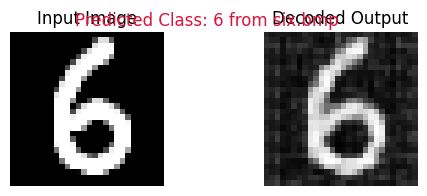

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
 File: seven.bmp =>  Predicted Digit: 2


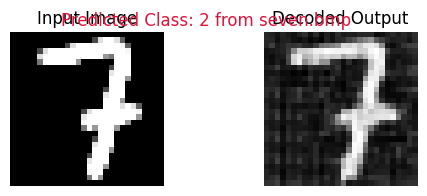

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
 File: eight.bmp =>  Predicted Digit: 8


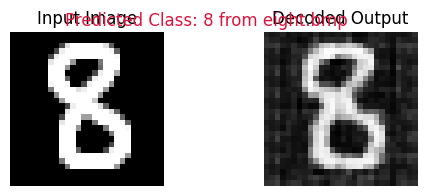

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
 File: nine.bmp =>  Predicted Digit: 9


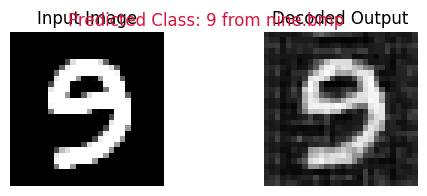

In [ ]:
image_folder = "/content"

# Preprocessing : grayscale, resize, normalize
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img).astype("float32") / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

# List of digits
digit_names = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

# image and predict
for name in digit_names:
    file_path = os.path.join(image_folder, f"{name}.bmp")

    if os.path.exists(file_path):
        input_img = preprocess_image(file_path)

        #  Predict
        decoded_img, predicted_probs = model.predict(input_img)
        predicted_class = np.argmax(predicted_probs, axis=1)[0]

        print(f" File: {name}.bmp =>  Predicted Digit: {predicted_class}")

        plt.figure(figsize=(6, 2))

        plt.subplot(1, 2, 1)
        plt.title("Input Image")
        plt.imshow(input_img[0, :, :, 0], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.title("Decoded Output")
        plt.imshow(decoded_img[0, :, :, 0], cmap="gray")
        plt.axis("off")

        plt.suptitle(f"Predicted Class: {predicted_class} from {name}.bmp", fontsize=12, color='crimson')
        plt.show()

    else:
        print(f" File {name}.bmp not found in {image_folder}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
 zero.bmp =>  Predicted: 0


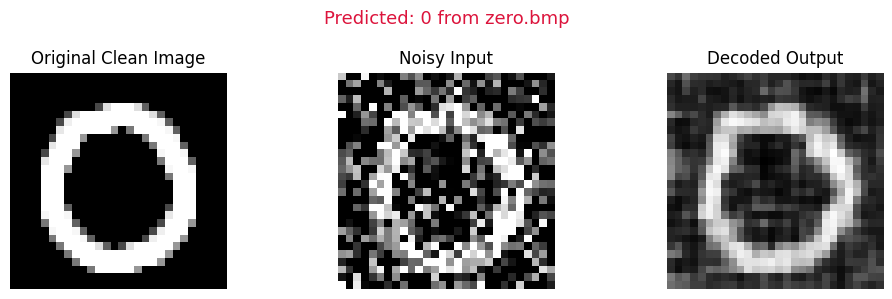

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
 one.bmp =>  Predicted: 1


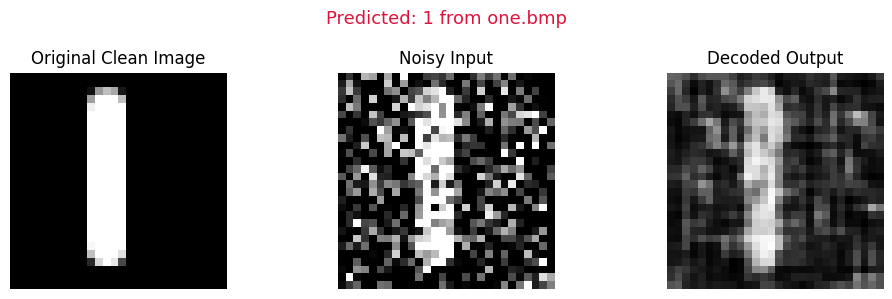

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
 two.bmp =>  Predicted: 2


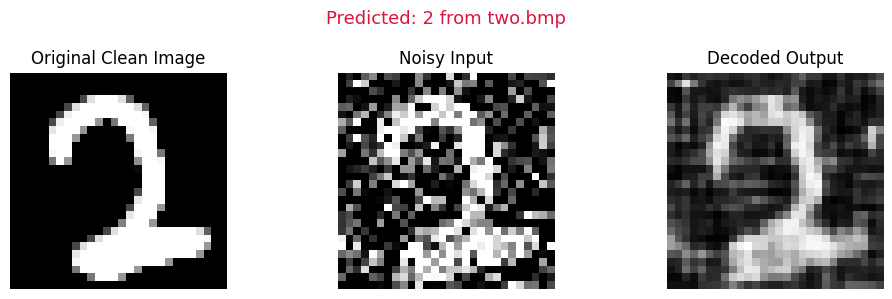

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
 three.bmp =>  Predicted: 3


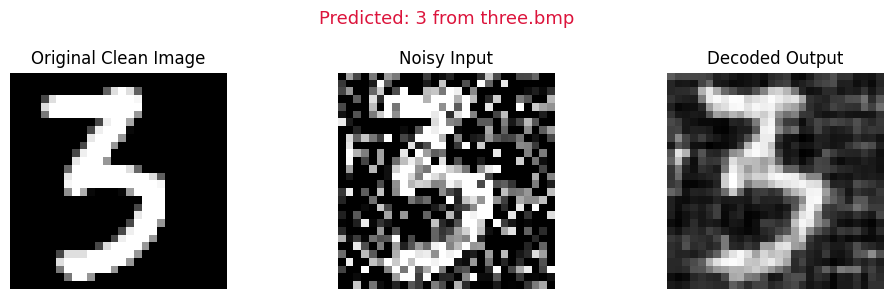

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
 four.bmp =>  Predicted: 7


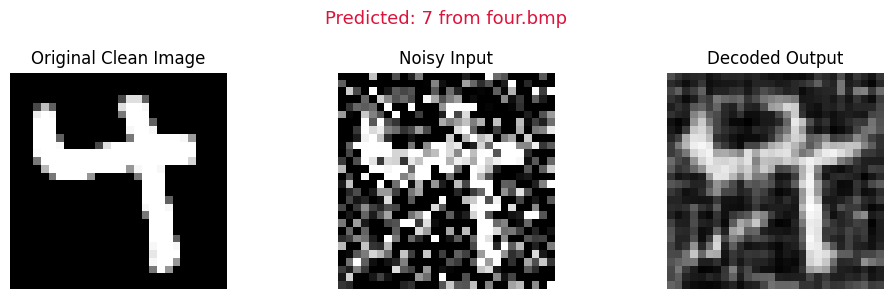

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
 five.bmp =>  Predicted: 5


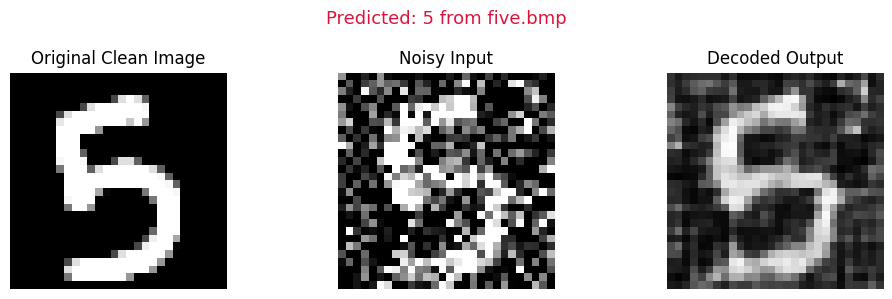

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
 six.bmp =>  Predicted: 6


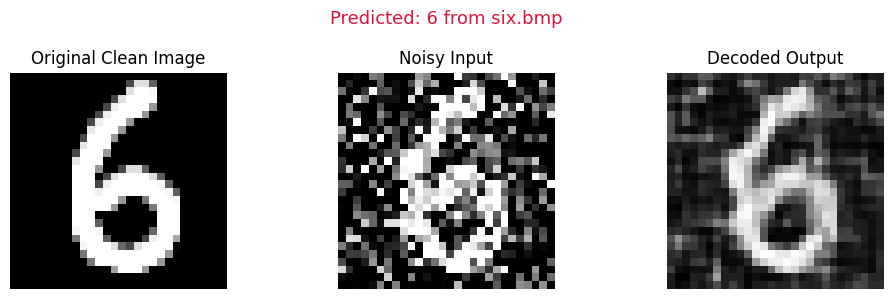

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
 seven.bmp =>  Predicted: 2


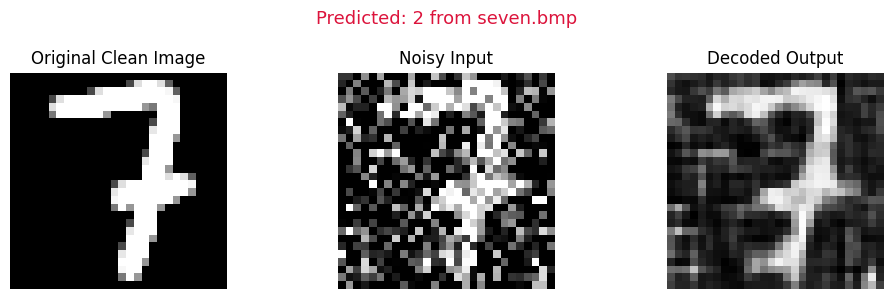

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
 eight.bmp =>  Predicted: 8


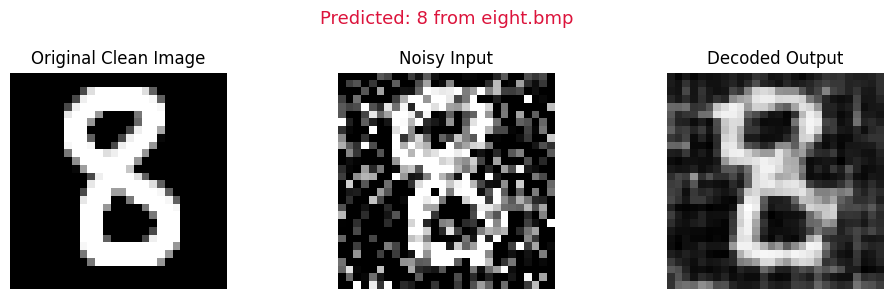

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
 nine.bmp =>  Predicted: 9


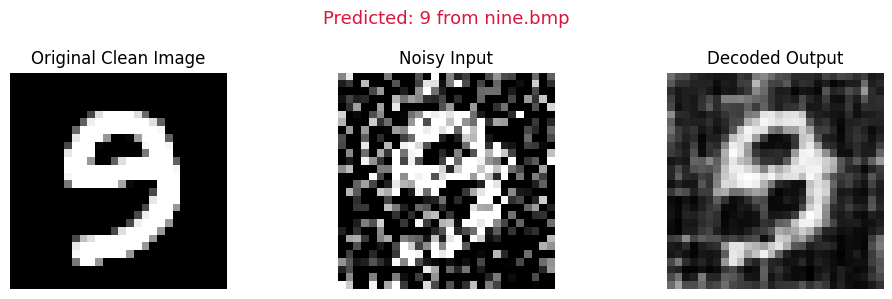

In [ ]:
image_folder = "/content"
noise_factor = 0.5

# preprocess and add noise
def preprocess_and_add_noise(image_path, noise_factor=0.5):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img).astype("float32") / 255.0

    clean_input = img_array.reshape(1, 28, 28, 1)

    #  Add Gaussian noise
    noisy_input = clean_input + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=clean_input.shape)
    noisy_input = np.clip(noisy_input, 0.0, 1.0)

    return clean_input, noisy_input

digit_names = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

#  Process each image
for name in digit_names:
    file_path = os.path.join(image_folder, f"{name}.bmp")

    if os.path.exists(file_path):
        clean_img, noisy_img = preprocess_and_add_noise(file_path, noise_factor=noise_factor)

        #  Predict
        decoded_img, predicted_probs = model.predict(noisy_img)
        predicted_class = np.argmax(predicted_probs, axis=1)[0]

        print(f" {name}.bmp =>  Predicted: {predicted_class}")

        #  Visualize
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 3, 1)
        plt.title("Original Clean Image")
        plt.imshow(clean_img[0, :, :, 0], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Noisy Input")
        plt.imshow(noisy_img[0, :, :, 0], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.title("Decoded Output")
        plt.imshow(decoded_img[0, :, :, 0], cmap="gray")
        plt.axis("off")

        plt.suptitle(f"Predicted: {predicted_class} from {name}.bmp", fontsize=13, color="crimson")
        plt.tight_layout()
        plt.show()

    else:
        print(f" File not found: {file_path}")


In [ ]:
#load data
(x_train,y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# pre processing
x_train = x_train.astype("float32") / 255.0
x_train = np.reshape (x_train, (len(x_train), 28, 28, 1))

x_test = x_test.astype("float32") / 255.0
x_test = np.reshape (x_test, (len(x_test), 28,28,1) )
print(x_train.shape)
print(x_test.shape)
# add noise
noise_factor = 0.5
noisy_x_train = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
noisy_x_train = np.clip(noisy_x_train, 0.0, 1.0)

noisy_x_test = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
noisy_x_test = np.clip(noisy_x_test, 0.0,1.0)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


input_layer = Input(shape=(28, 28, 1))

# -------- ENCODER --------
x = layers.Conv2D(16, (3,3), activation="relu", padding="same", name="enc_conv1")(input_layer)
x = layers.MaxPooling2D((2,2), padding="same", name="enc_pool1")(x)
x = layers.Conv2D(32, (3,3), activation="relu", padding="same", name="enc_conv2")(x)
encoded = layers.MaxPooling2D((2,2), padding="same", name="enc_pool2")(x)

# -------- DECODER --------
x = layers.Conv2DTranspose(32, (3,3), strides=2, padding="same", activation="relu", name="dec_deconv1")(encoded)
x = layers.Conv2DTranspose(16, (3,3), strides=2, padding="same", activation="relu", name="dec_deconv2")(x)
decoded = layers.Conv2DTranspose(1, (3,3) , padding="same", activation="sigmoid", name="dec_output")(x)

# -------- DETECTOR --------
y = layers.Conv2D(16, (3,3), activation="relu", padding="same", name="det_conv1")(decoded)
y = layers.MaxPooling2D((2,2), padding="same", name="det_pool1")(y)
y = layers.Conv2D(32, (3,3), activation="relu", padding="same", name="det_conv2")(y)
y = layers.MaxPooling2D((2,2), padding="same", name="det_pool2")(y)
y = layers.Flatten()(y)
y = layers.Dense(64, activation="relu")(y)
output_class = layers.Dense(10, activation="softmax", name="class_output")(y)

model = models.Model(inputs=input_layer, outputs=[decoded, output_class])

model.compile(
    optimizer='adam',
    loss={
        'dec_output': 'binary_crossentropy',
        'class_output': 'categorical_crossentropy'
    },
    metrics={
        'class_output': 'accuracy'
    }
)
model.summary()

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv1 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_pool1 (MaxPooling2D)        │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv2 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_pool2 (MaxPooling2D)        │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_deconv1 (Conv2DTranspose)   │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_deconv2 (Conv2DTranspose)   │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_output (Conv2DTranspose)    │ (None, 28, 28, 1)      │           145 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ det_conv1 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ det_pool1 (MaxPooling2D)        │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ det_conv2 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ det_pool2 (MaxPooling2D)        │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_output (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,683 (487.04 KB)

 Trainable params: 124,683 (487.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(
    x=noisy_x_train,
    y={'dec_output': noisy_x_train, 'class_output': y_train},
    epochs=25,
    batch_size=128,
    validation_data=(noisy_x_test, {'dec_output': noisy_x_test, 'class_output': y_test})
)

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 200ms/step - class_output_accuracy: 0.4002 - class_output_loss: 1.6156 - dec_output_loss: 0.5738 - loss: 2.1894 - val_class_output_accuracy: 0.9136 - val_class_output_loss: 0.2698 - val_dec_output_loss: 0.5179 - val_loss: 0.7894
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 197ms/step - class_output_accuracy: 0.9188 - class_output_loss: 0.2541 - dec_output_loss: 0.5170 - loss: 0.7712 - val_class_output_accuracy: 0.9429 - val_class_output_loss: 0.1801 - val_dec_output_loss: 0.5094 - val_loss: 0.6913
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 148s 209ms/step - class_output_accuracy: 0.9435 - class_output_loss: 0.1783 - dec_output_loss: 0.5104 - loss: 0.6887 - val_class_output_accuracy: 0.9522 - val_class_output_loss: 0.1441 - val_dec_output_loss: 0.5059 - val_loss: 0.6516
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 197ms/step - class_output_accuracy: 0.9501 - class_output_loss: 0.1531 - dec_output_loss: 0.5061 - loss: 0.6592 - val_class_output_acc

 comparison OF ENCODER and DETECTOR conv layers 
Total Weights Compared: 4,752
Mean Absolute Difference (MAD): 0.171257
Cosine Similarity  (CosSim): 0.015651


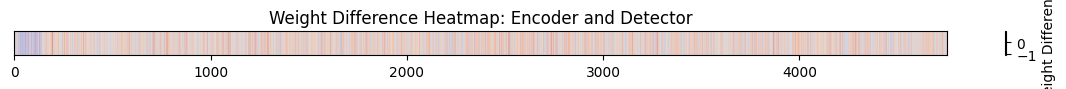

In [13]:
# weights of encoder and detector
encoder_layers = ["enc_conv1", "enc_conv2"]
detector_layers = ["det_conv1", "det_conv2"]

def get_concat_weights(layer_names):
    all_weights = []
    for name in layer_names:
        weights = model.get_layer(name).get_weights()
        if weights:  #  weights[0] = kernel, weights[1] = bias
            all_weights.append(weights[0].flatten())  # just kernels
    return np.concatenate(all_weights)

enc_weights = get_concat_weights(encoder_layers)
det_weights = get_concat_weights(detector_layers)

# comparison metrics
def compare_weight_blocks(w1, w2):
    mad = np.mean(np.abs(w1 - w2))
    cos_sim = np.dot(w1, w2) / (np.linalg.norm(w1) * np.linalg.norm(w2) + 1e-10)
    return mad, cos_sim

# Compute and print results
mad_total, cos_total = compare_weight_blocks(enc_weights, det_weights)

print(" comparison OF ENCODER and DETECTOR conv layers ")
print(f"Total Weights Compared: {len(enc_weights):,}")
print(f"Mean Absolute Difference (MAD): {mad_total:.6f}")
print(f"Cosine Similarity  (CosSim): {cos_total:.6f}")

diff = enc_weights - det_weights
plt.figure(figsize=(12, 1))
plt.imshow(diff.reshape(1, -1), cmap='coolwarm', aspect='auto')
plt.colorbar(label="Weight Difference")
plt.title("Weight Difference Heatmap: Encoder and Detector")
plt.yticks([])
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
 File: zero.bmp =>  Predicted Digit: 0


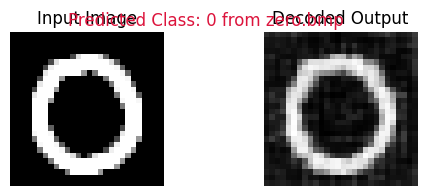

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
 File: one.bmp =>  Predicted Digit: 1


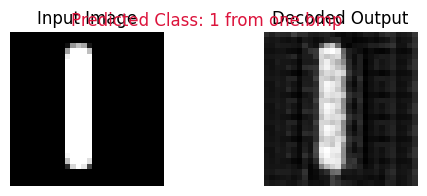

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
 File: two.bmp =>  Predicted Digit: 2


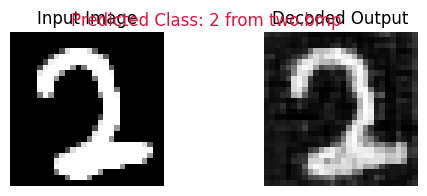

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
 File: three.bmp =>  Predicted Digit: 3


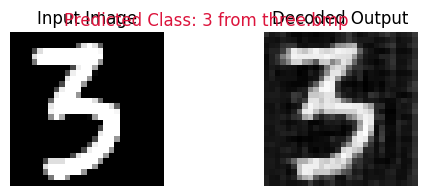

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
 File: four.bmp =>  Predicted Digit: 7


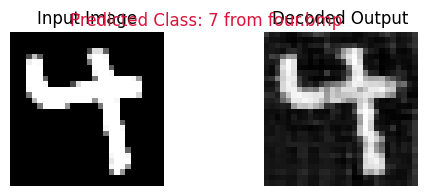

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
 File: five.bmp =>  Predicted Digit: 5


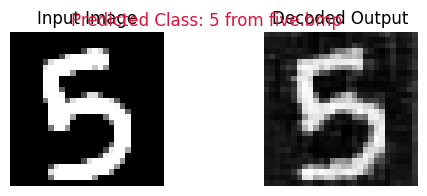

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
 File: six.bmp =>  Predicted Digit: 6


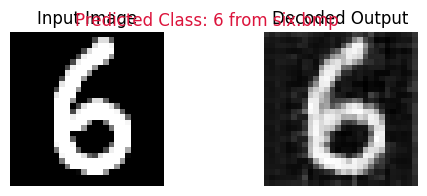

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
 File: seven.bmp =>  Predicted Digit: 7


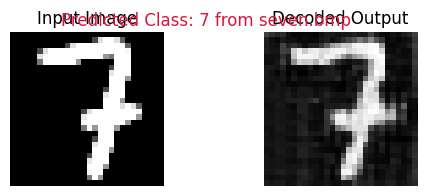

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
 File: eight.bmp =>  Predicted Digit: 8


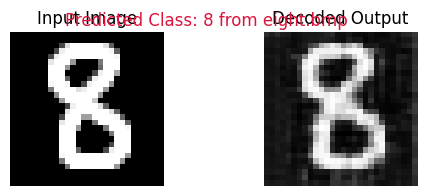

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
 File: nine.bmp =>  Predicted Digit: 9


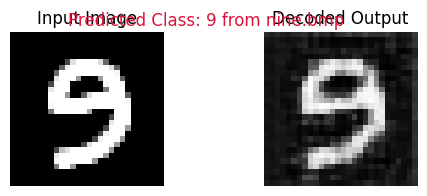

In [14]:
image_folder = "/content"

# Preprocessing : grayscale, resize, normalize
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img).astype("float32") / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

# List of digits
digit_names = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

# image and predict
for name in digit_names:
    file_path = os.path.join(image_folder, f"{name}.bmp")

    if os.path.exists(file_path):
        input_img = preprocess_image(file_path)

        #  Predict
        decoded_img, predicted_probs = model.predict(input_img)
        predicted_class = np.argmax(predicted_probs, axis=1)[0]

        print(f" File: {name}.bmp =>  Predicted Digit: {predicted_class}")

        plt.figure(figsize=(6, 2))

        plt.subplot(1, 2, 1)
        plt.title("Input Image")
        plt.imshow(input_img[0, :, :, 0], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.title("Decoded Output")
        plt.imshow(decoded_img[0, :, :, 0], cmap="gray")
        plt.axis("off")

        plt.suptitle(f"Predicted Class: {predicted_class} from {name}.bmp", fontsize=12, color='crimson')
        plt.show()

    else:
        print(f" File {name}.bmp not found in {image_folder}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
 zero.bmp =>  Predicted: 0


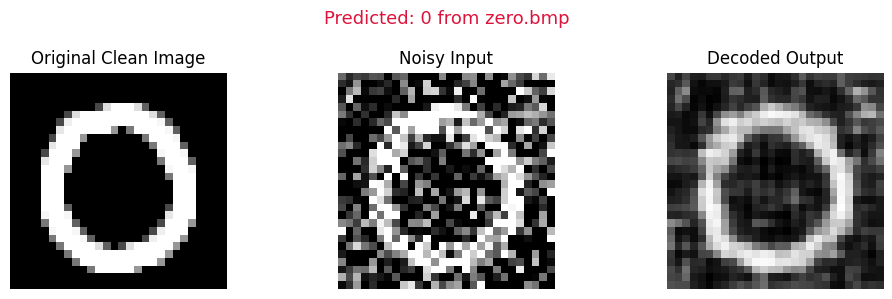

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
 one.bmp =>  Predicted: 1


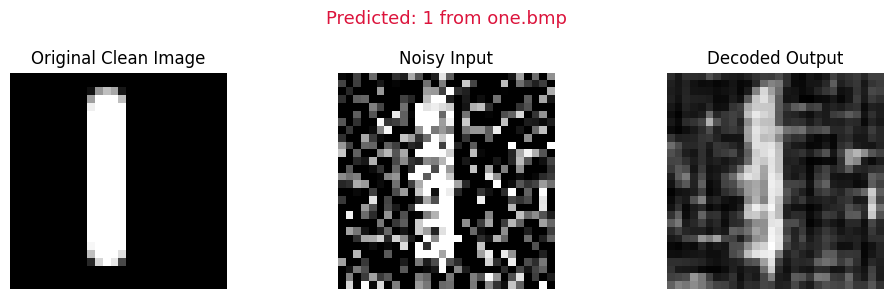

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
 two.bmp =>  Predicted: 2


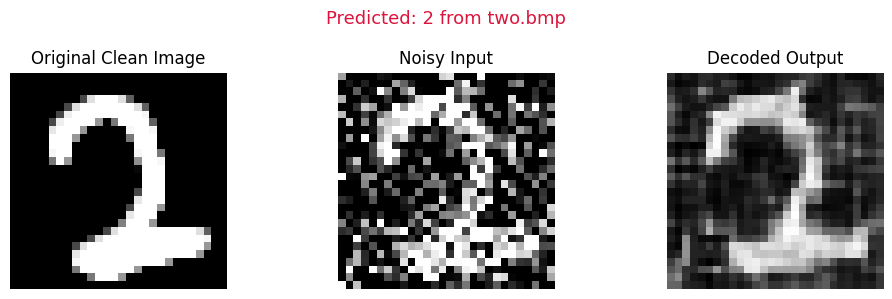

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
 three.bmp =>  Predicted: 3


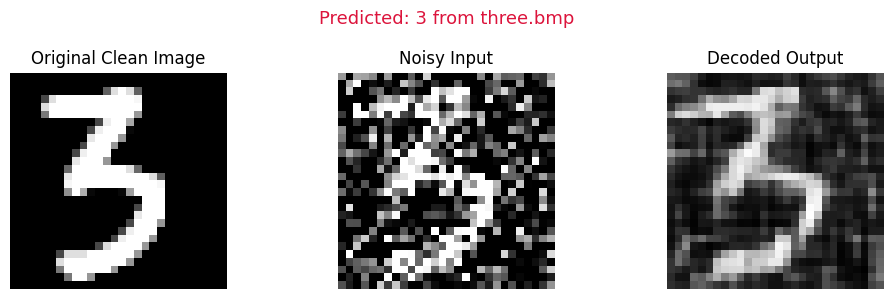

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
 four.bmp =>  Predicted: 7


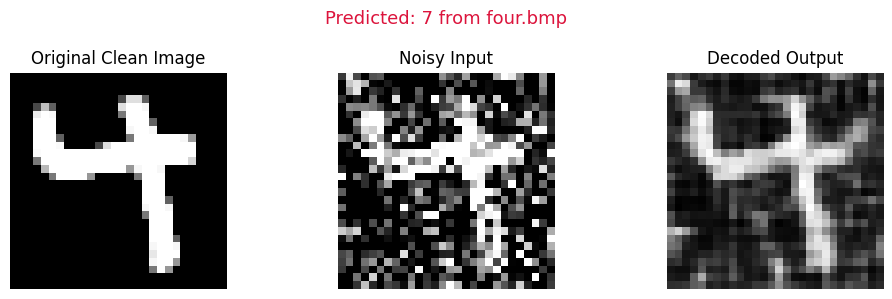

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
 five.bmp =>  Predicted: 5


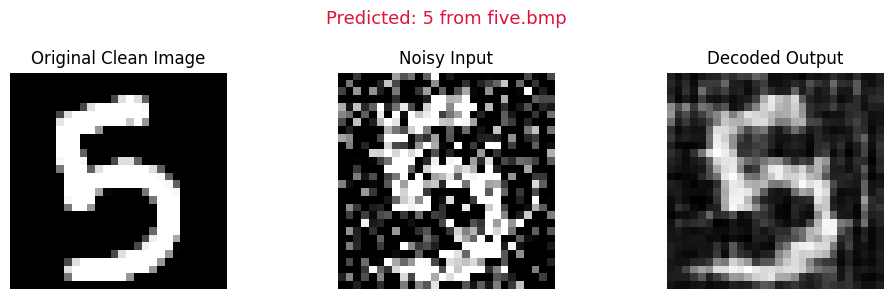

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
 six.bmp =>  Predicted: 6


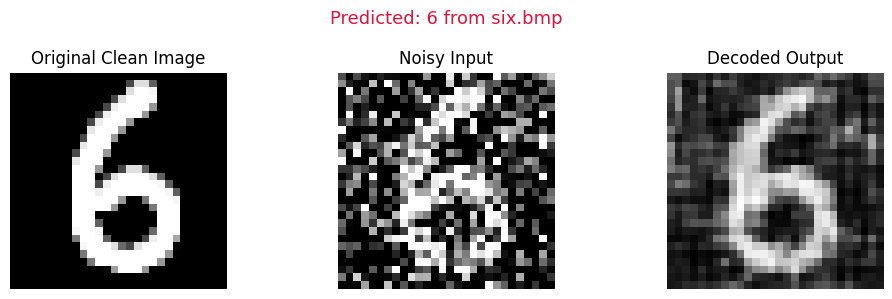

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
 seven.bmp =>  Predicted: 3


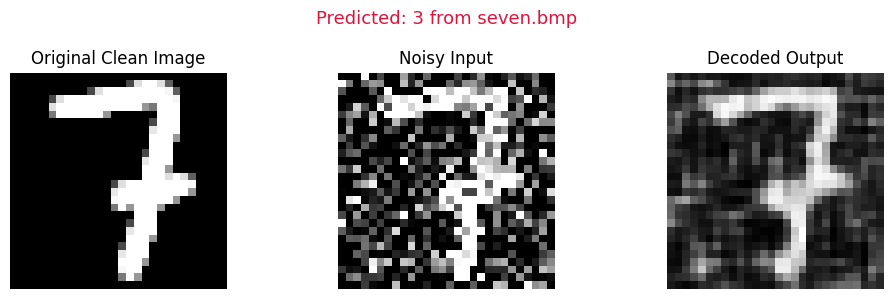

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
 eight.bmp =>  Predicted: 8


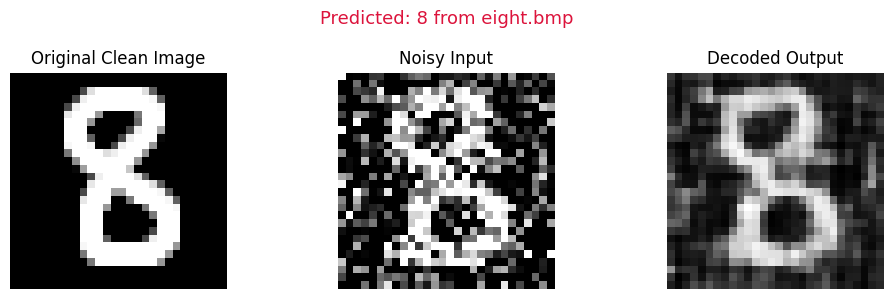

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
 nine.bmp =>  Predicted: 9


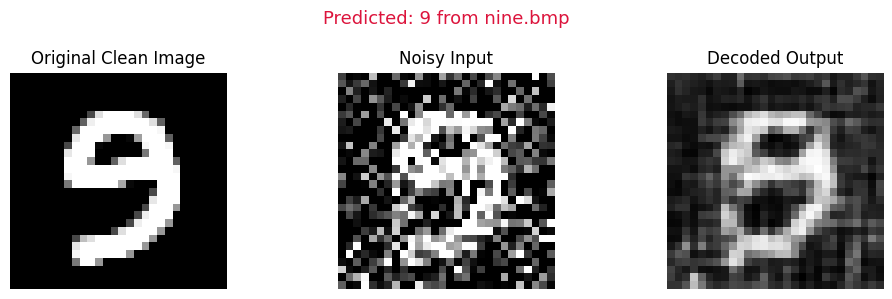

In [15]:
image_folder = "/content"
noise_factor = 0.5

# preprocess and add noise
def preprocess_and_add_noise(image_path, noise_factor=0.5):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img).astype("float32") / 255.0

    clean_input = img_array.reshape(1, 28, 28, 1)

    #  Add Gaussian noise
    noisy_input = clean_input + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=clean_input.shape)
    noisy_input = np.clip(noisy_input, 0.0, 1.0)

    return clean_input, noisy_input

digit_names = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

#  Process each image
for name in digit_names:
    file_path = os.path.join(image_folder, f"{name}.bmp")

    if os.path.exists(file_path):
        clean_img, noisy_img = preprocess_and_add_noise(file_path, noise_factor=noise_factor)

        #  Predict
        decoded_img, predicted_probs = model.predict(noisy_img)
        predicted_class = np.argmax(predicted_probs, axis=1)[0]

        print(f" {name}.bmp =>  Predicted: {predicted_class}")

        #  Visualize
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 3, 1)
        plt.title("Original Clean Image")
        plt.imshow(clean_img[0, :, :, 0], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Noisy Input")
        plt.imshow(noisy_img[0, :, :, 0], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.title("Decoded Output")
        plt.imshow(decoded_img[0, :, :, 0], cmap="gray")
        plt.axis("off")

        plt.suptitle(f"Predicted: {predicted_class} from {name}.bmp", fontsize=13, color="crimson")
        plt.tight_layout()
        plt.show()

    else:
        print(f" File not found: {file_path}")
